# Logistic Regression with scikit-learn


This notebook focuses on the **workflow** for implementing logistic regression with scikit-learn. You will see that the problem at hand can be solved perfectly with logistic regression. 

By the end of this notebook, you should know what steps to take in sequence to implement a model with scikit-learn and be able to apply it to unseen data.


## Data

To start with a simple example, let’s say that your goal is to build a logistic regression model in Python in order to determine whether candidates would get admitted to a prestigious university.

Here, there are two possible outcomes: Admitted (represented by the value of ‘1’) vs. Rejected (represented by the value of ‘0’).

You can then build a logistic regression in Python, where:

The dependent variable represents whether a person gets admitted and the 3 independent variables are the GMAT score, GPA and Years of work experience.

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [8]:
# Generating the data
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [3]:
# Defining target and predictors 
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

In [4]:
# Train-test-split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Create Logistic Regression

In [5]:
# Modelling
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

### Confusion Matrix

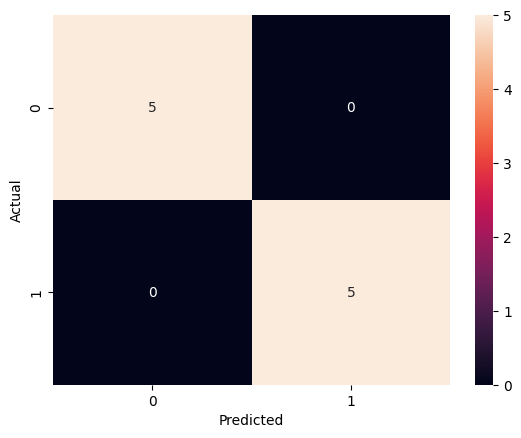

In [6]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True);

In [9]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [10]:
confusion_matrix(y_test, y_pred)

array([[5, 0],
       [0, 5]], dtype=int64)

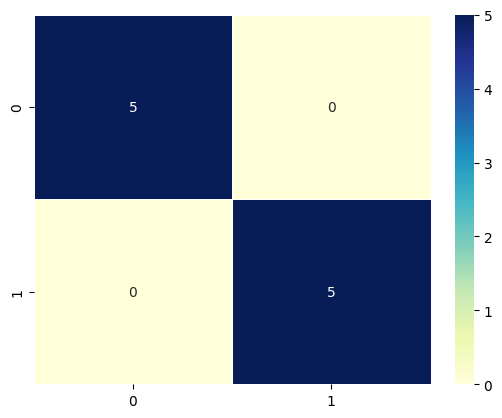

In [11]:
# Confusion matrix using the confusion_matrix function from sklearn
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

**Check your understanding**

- Check out the Scikit-Learn documentation for logistic regression and find out how to output the estimated parameters of your model.

- Scikit-Learn usually has pretty good default values set for the hyperparameters of models. Try printing out all the defined hyperparameters of your model and check what these hyperparameters mean and what other options would be available for these hyperparameters.

- Try to change the threshold to 0.3 and print out the confusion matrix for this threshold. 

<details><summary>
Click here for a hint for the last task
</summary>
You need to output the predicted probabilities of your model and use a function that gives you a value of 0 if the predicted probability is less than/equal to 0.3 and 1 if it is above the threshold. Now you can use this array as y_pred to print the confusion matrix.
</details>


Answers:

In [14]:
# - Check out the Scikit-Learn documentation for logistic regression and find out how to output the estimated parameters of your model.
intercept_b0 = logistic_regression.intercept_
coefficient_b1 = logistic_regression.coef_

print ("the intercept is", intercept_b0, "and the coefficient is", coefficient_b1)


the intercept is [-47.7694683] and the coefficient is [[0.06245484 0.72252184 1.37612277]]


In [16]:
# Scikit-Learn usually has pretty good default values set for the hyperparameters of models. 
# Try printing out all the defined hyperparameters of your model and check what these hyperparameters mean and what other options would be available for these hyperparameters.

#class sklearn.linear_model.LogisticRegression(penalty='deprecated', *, C=1.0, l1_ratio=0.0, dual=False, tol=0.0001, 
# fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, 
# verbose=0, warm_start=False, n_jobs=None)

logistic_regression.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

| Hyperparameter  | Default   | What it controls                                                                        | Common options / notes                            |
| --------------- | --------- | --------------------------------------------------------------------------------------- | ------------------------------------------------- |
| `fit_intercept` | `True`    | Whether the model learns an intercept (`b0`). If `False`, the intercept is forced to 0. | `True`, `False`                                   |
| `C`             | `1.0`     | Inverse of regularization strength. Smaller values mean stronger regularization.        | Any positive float (e.g. `0.1`, `1`, `10`)        |
| `penalty`       | `'l2'`    | Type of regularization applied to the coefficients.                                     | `'l2'`, `'l1'`, `'elasticnet'`, `'none'`          |
| `solver`        | `'lbfgs'` | Optimization algorithm used to find the model parameters.                               | `'lbfgs'`, `'liblinear'`, `'saga'`, `'newton-cg'` |
| `max_iter`      | `100`     | Maximum number of iterations allowed for the optimizer to converge.                     | Any positive integer                              |
| `tol`           | `0.0001`  | Convergence tolerance; training stops when improvement is smaller than this value.      | Smaller = stricter convergence                    |
| `class_weight`  | `None`    | Weights assigned to classes in the loss function; useful for imbalanced data.           | `None`, `'balanced'`, or dict                     |


In [17]:
# Try to change the threshold to 0.3 and print out the confusion matrix for this threshold. 
y_prob = logistic_regression.predict_proba(X_test)[:, 1]

y_pred_03 = (y_prob >= 0.3).astype(int)

conf_matrix_03 = pd.crosstab(
    y_test,
    y_pred_03,
    rownames=['Actual'],
    colnames=['Predicted']
)

conf_matrix_03



Predicted,0,1
Actual,,
0,5,0
1,0,5


<Axes: xlabel='Predicted', ylabel='Actual'>

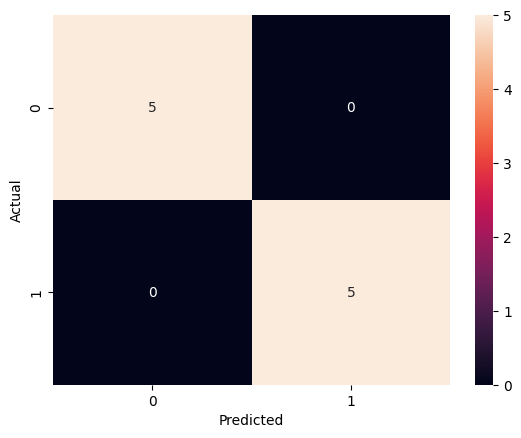

In [18]:
sns.heatmap(conf_matrix_03, annot=True, fmt='d')
